In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("version of numpy: ", np.__version__)
print("version of pandas: ", pd.__version__)

version of numpy:  1.21.5
version of pandas:  1.4.4


# Event Data
Contains data on the use of the mobile application of users who registered from July 29 to September 1, 2019:

* user_id - user identifier;
* event_date - time of the event;
* event_type - type of event: registration - registration in the application; 
* simple_event - click event in the application; purchase - an event of purchase within the application; purchase_amount - purchase amount.

In [10]:
event_data = pd.read_csv('event_data.csv')

print(f'shape of the data: {data.shape[0]} rows and {data.shape[1]} columns')

event_data.head()

shape of the data: 79742 rows and 4 columns


,user_id,event_date,event_type,purchase_amount
0,c40e6a,2019-07-29 00:02:15,registration,NaN
1,a2b682,2019-07-29 00:04:46,registration,NaN
2,9ac888,2019-07-29 00:13:22,registration,NaN
3,93ff22,2019-07-29 00:16:47,registration,NaN
4,65ef85,2019-07-29 00:19:23,registration,NaN


In [11]:
# To use the date data type we convert the data:
event_data['event_date'] = pd.to_datetime(event_data['event_date'])

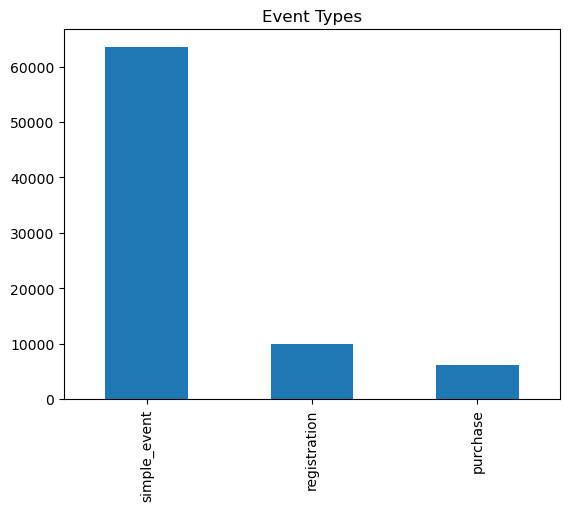

In [12]:
# quickly explore the event_type distributions
event_data['event_type'].value_counts().plot(kind='bar')
plt.title('Event Types')
plt.show()

2. Highlight user cohorts based on the week of registration in the application. The cohort
identifier should be the week ordinal (for example, the week from July 29 to August 4
should have identifier 31).

note: In this context, a cohort refers to a group of users who share a common characteristic, such as the week they registered in the mobile application. In other words, a cohort is a group of users who are distinguished from others based on a specific criteria and are tracked over time to observe their behavior and characteristics.

In [26]:
# create a new column with the week ordinal of the registration date 
event_data['week_ordinal'] = event_data['event_date'].dt.isocalendar().week

# Group by week_ordinal and user_id to get the week of registration for each user
cohort_data = event_data.groupby(['week_ordinal', 'user_id'])

# Get the first week of registration for each user
# cohort_data = cohort_data.first()
cohort_data.head()

,user_id,event_date,event_type,purchase_amount,week_ordinal
0,c40e6a,2019-07-29 00:02:15,registration,NaN,31
1,a2b682,2019-07-29 00:04:46,registration,NaN,31
2,9ac888,2019-07-29 00:13:22,registration,NaN,31
3,93ff22,2019-07-29 00:16:47,registration,NaN,31
4,65ef85,2019-07-29 00:19:23,registration,NaN,31
...,...,...,...,...,...
79734,55ae79,2019-09-01 23:55:56,simple_event,NaN,35
79736,6e6b1c,2019-09-01 23:56:54,simple_event,NaN,35
79738,a84999,2019-09-01 23:57:50,simple_event,NaN,35
79740,1c2210,2019-09-01 23:59:51,simple_event,NaN,35


In [27]:
# first week of registration for each user
cohort_data = cohort_data.first()

print('---head of cohort_data---')
print(cohort_data.head())
print('---tail of cohort_data---')
print(cohort_data.tail())

---head of cohort_data---
                              event_date    event_type  purchase_amount
week_ordinal user_id                                                   
31           00082c  2019-08-03 17:37:37  registration              NaN
             00505f  2019-07-31 10:14:33  registration              NaN
             005779  2019-07-31 18:14:23  registration              NaN
             0116a1  2019-08-04 06:14:01  registration              NaN
             016b02  2019-08-04 13:17:17  registration              NaN
---tail of cohort_data---
                              event_date    event_type  purchase_amount
week_ordinal user_id                                                   
35           ffd6d6  2019-08-28 10:39:45  registration              NaN
             ffe60a  2019-08-26 06:35:05  registration              NaN
             fff039  2019-08-26 21:46:49  registration              NaN
             fff22e  2019-08-26 23:02:32  simple_event              NaN
            

In [29]:
# reset the index to make week_ordinal a column
cohort_data.reset_index(inplace=True)
cohort_data.head()

,index,week_ordinal,user_id,event_date,event_type,purchase_amount
0,0,31,00082c,2019-08-03 17:37:37,registration,NaN
1,1,31,00505f,2019-07-31 10:14:33,registration,NaN
2,2,31,005779,2019-07-31 18:14:23,registration,NaN
3,3,31,0116a1,2019-08-04 06:14:01,registration,NaN
4,4,31,016b02,2019-08-04 13:17:17,registration,NaN


---cohort_counts---
week_ordinal
31    1975
32    3784
33    5102
34    5834
35    6238
Name: user_id, dtype: int64


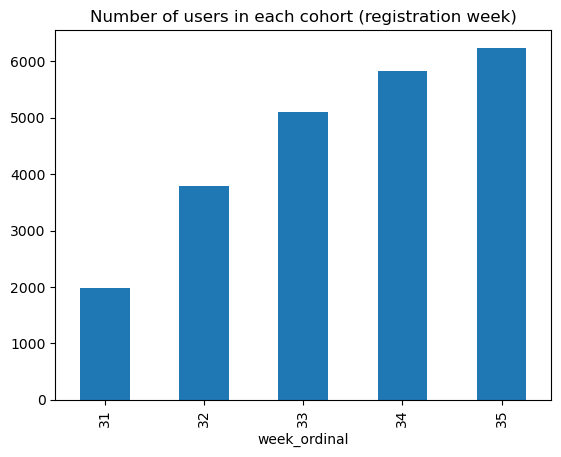

In [37]:
# its possible to create a new column with the cohort number
# cohort_data['cohort'] = cohort_data['week_ordinal'].apply(lambda x: x - 31) 
# right now we don't need it, it's just for illustration, 
# but in this case it is asked to use 31 as the cohort number for week the week from July 29 to August 4

# Group the data by week_ordinal and calculate the number of unique users in each cohort
cohort_counts = cohort_data.groupby('week_ordinal')['user_id'].nunique()
print('---cohort_counts---')
print(cohort_counts)

cohort_counts.plot(kind='bar')
plt.title('Number of users in each cohort (registration week)')
plt.show()

3. How many unique users in the cohort with ID 33?

In [35]:
print(f"The number of unique users in the cohort with identifier 33: {cohort_counts[33]}")
print("cohort meaning the week of registration") 

The number of unique users in the cohort with identifier 33: 5102
cohort meaning the week of registration
